In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=6,6

In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.dropna(inplace=True)

## Regression plots

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

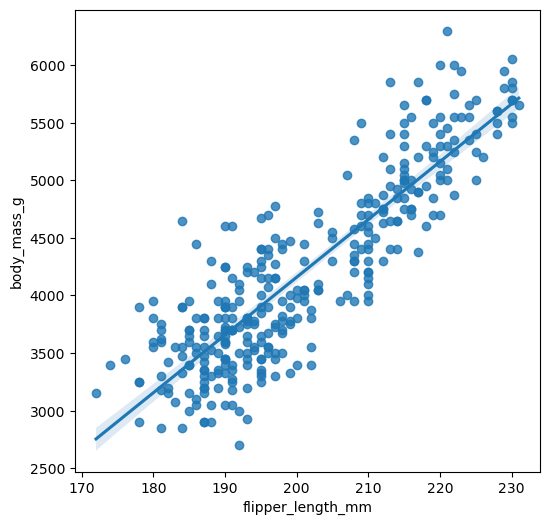

In [7]:
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=penguins)

It's often the case that we would want to include the regression equation. Unfortunately seaborn doesn't automatically do it for us.

The solution would be to manually add it. For that we can use the scikit-learn library. You might need to install it with the following.

In [8]:
#!python -m pip install scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
X = penguins.loc[:,["flipper_length_mm"]]
y = penguins.loc[:,"body_mass_g"]
model.fit(X,y)

LinearRegression()

In [11]:
r_squared = f"R-Squared: {model.score(X, y):.2f}"
r_squared

'R-Squared: 0.76'

In [12]:
best_fit = (f"y = {model.intercept_:+.2f} + {model.coef_[0]:.2f}X")
best_fit

'y = -5872.09 + 50.15X'

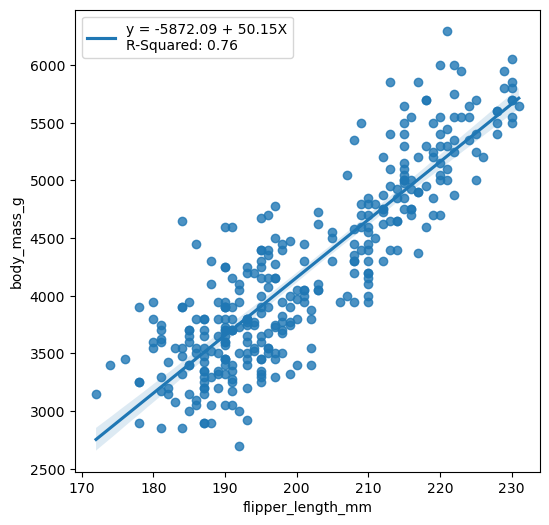

In [13]:
ax = sns.regplot(x='flipper_length_mm', y='body_mass_g', data=penguins, 
                 line_kws={"label": f"{best_fit}\n{r_squared}"})
ax.legend()

We can also plot the residuals

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

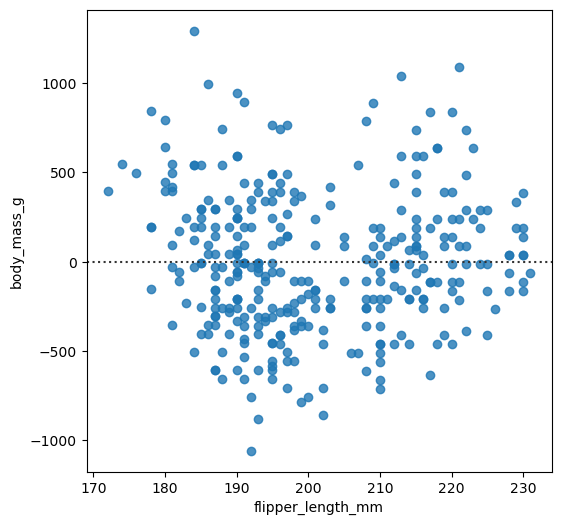

In [14]:
sns.residplot(x='flipper_length_mm', y='body_mass_g', data=penguins)

A more flexible option that builds on top of `regplot` is the `lmplot`

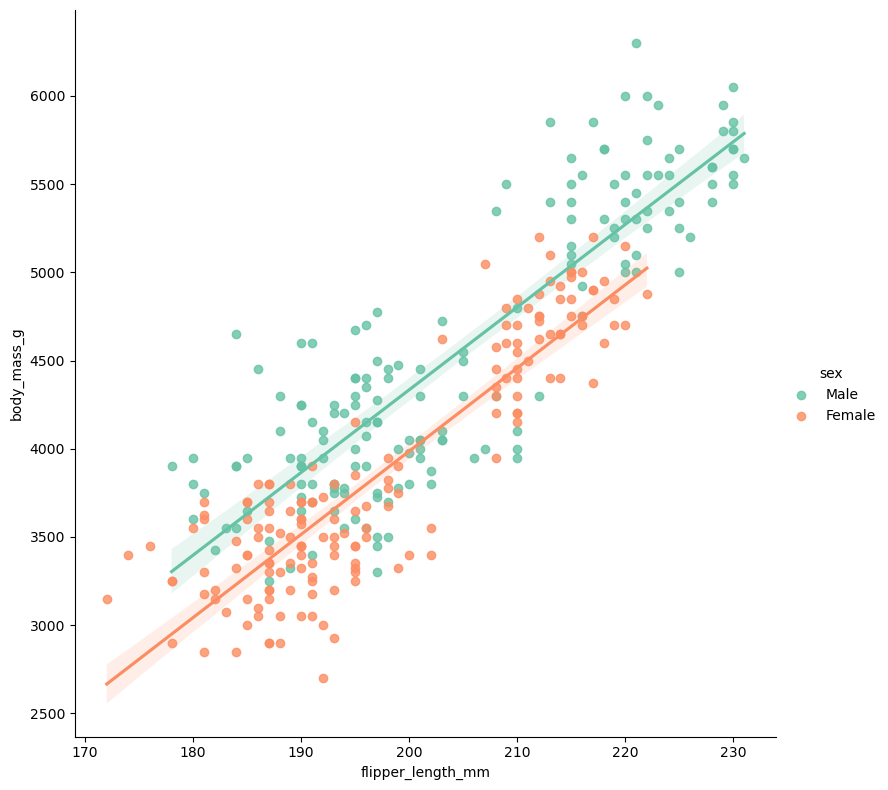

In [15]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=8,
    hue='sex',
    palette='Set2')

To add regression equations for the different categories is a bit more cumbersome. A not so bullet proof soluation is below. 

In [16]:
def reg_calc(X,y):
    """
    Fit a regression model.

    Args:
        X : A matrix or dataframe containing the predictor variables.
        y: A vector or series with the response variable.

    Returns:
        The intercept, slope and R-squared.
    """
    model = LinearRegression()
    model.fit(X,y)
    r_squared = f"R-Squared: {model.score(X, y):.2f}"
    best_fit = (f"y = {model.intercept_:+.2f} + {model.coef_[0]:.2f}X")
    return best_fit, r_squared

In [17]:
def reg_plot(column,category):
    """
    Plot separate regression lines for each category.

    Args:
        column : A string with the name of the dataframe column with the categories of interest. Hard coded only for penguins here.
        category: A string with the actual categorical value

    Returns:
        A plot with seqarate regression lines and corresponding equations for each category.
    """
    column = column
    category = category
    data = penguins.loc[penguins[column] == category]
    X = data.loc[:,["flipper_length_mm"]]
    y = data.loc[:,"body_mass_g"]
    best_fit, r_squared = reg_calc(X,y)
    ax = sns.regplot(
    data=data, x=X,
    y=y, ci=None,
    line_kws={"label": f"{category}:{best_fit}\n{r_squared}"}
    )
    ax.set_title("Regression Analysis of Temperatures")
    ax.legend()

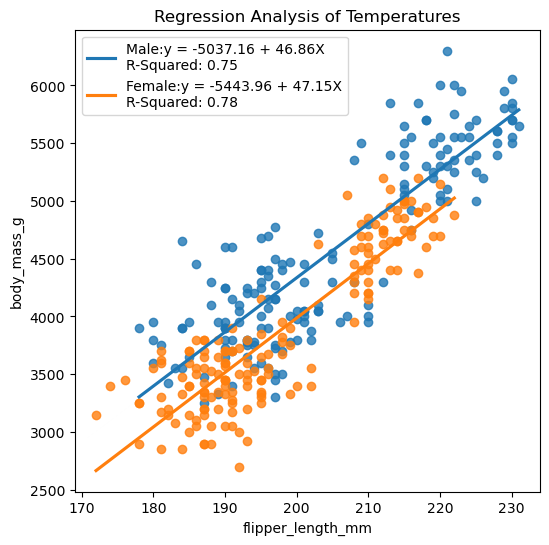

In [18]:
for gender in ["Male", "Female"]:
    reg_plot("sex",gender)
    

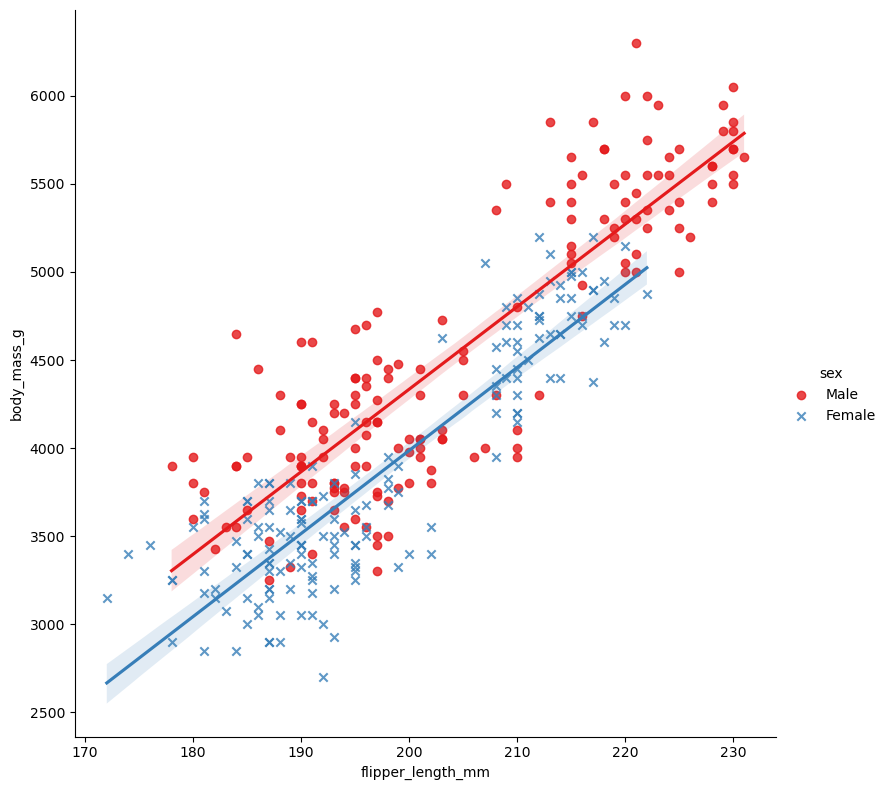

In [19]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=8,
    hue='sex',
    markers=['o','x'],
    palette="Set1")

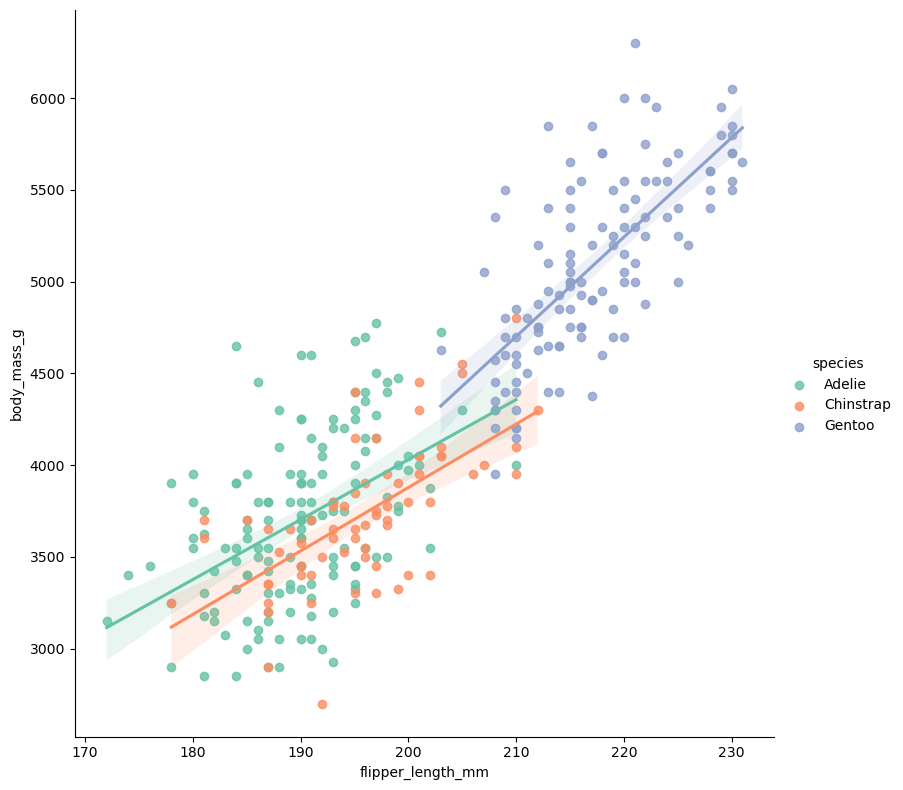

In [20]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=8,
    hue='species',
    palette='Set2')

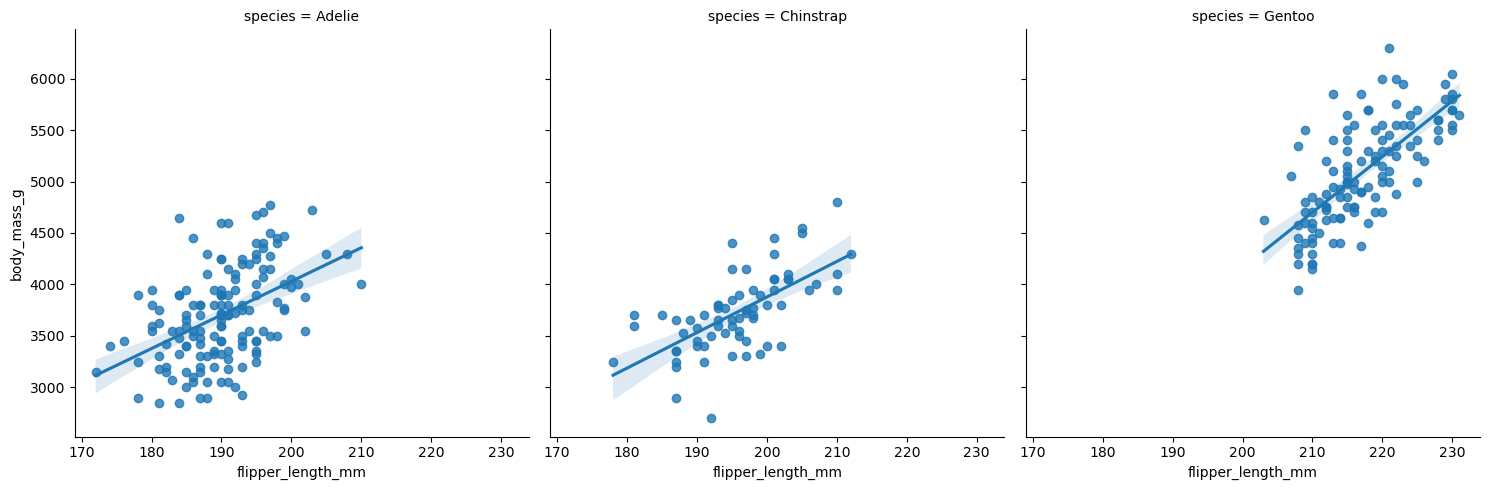

In [21]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=5,
    col='species')

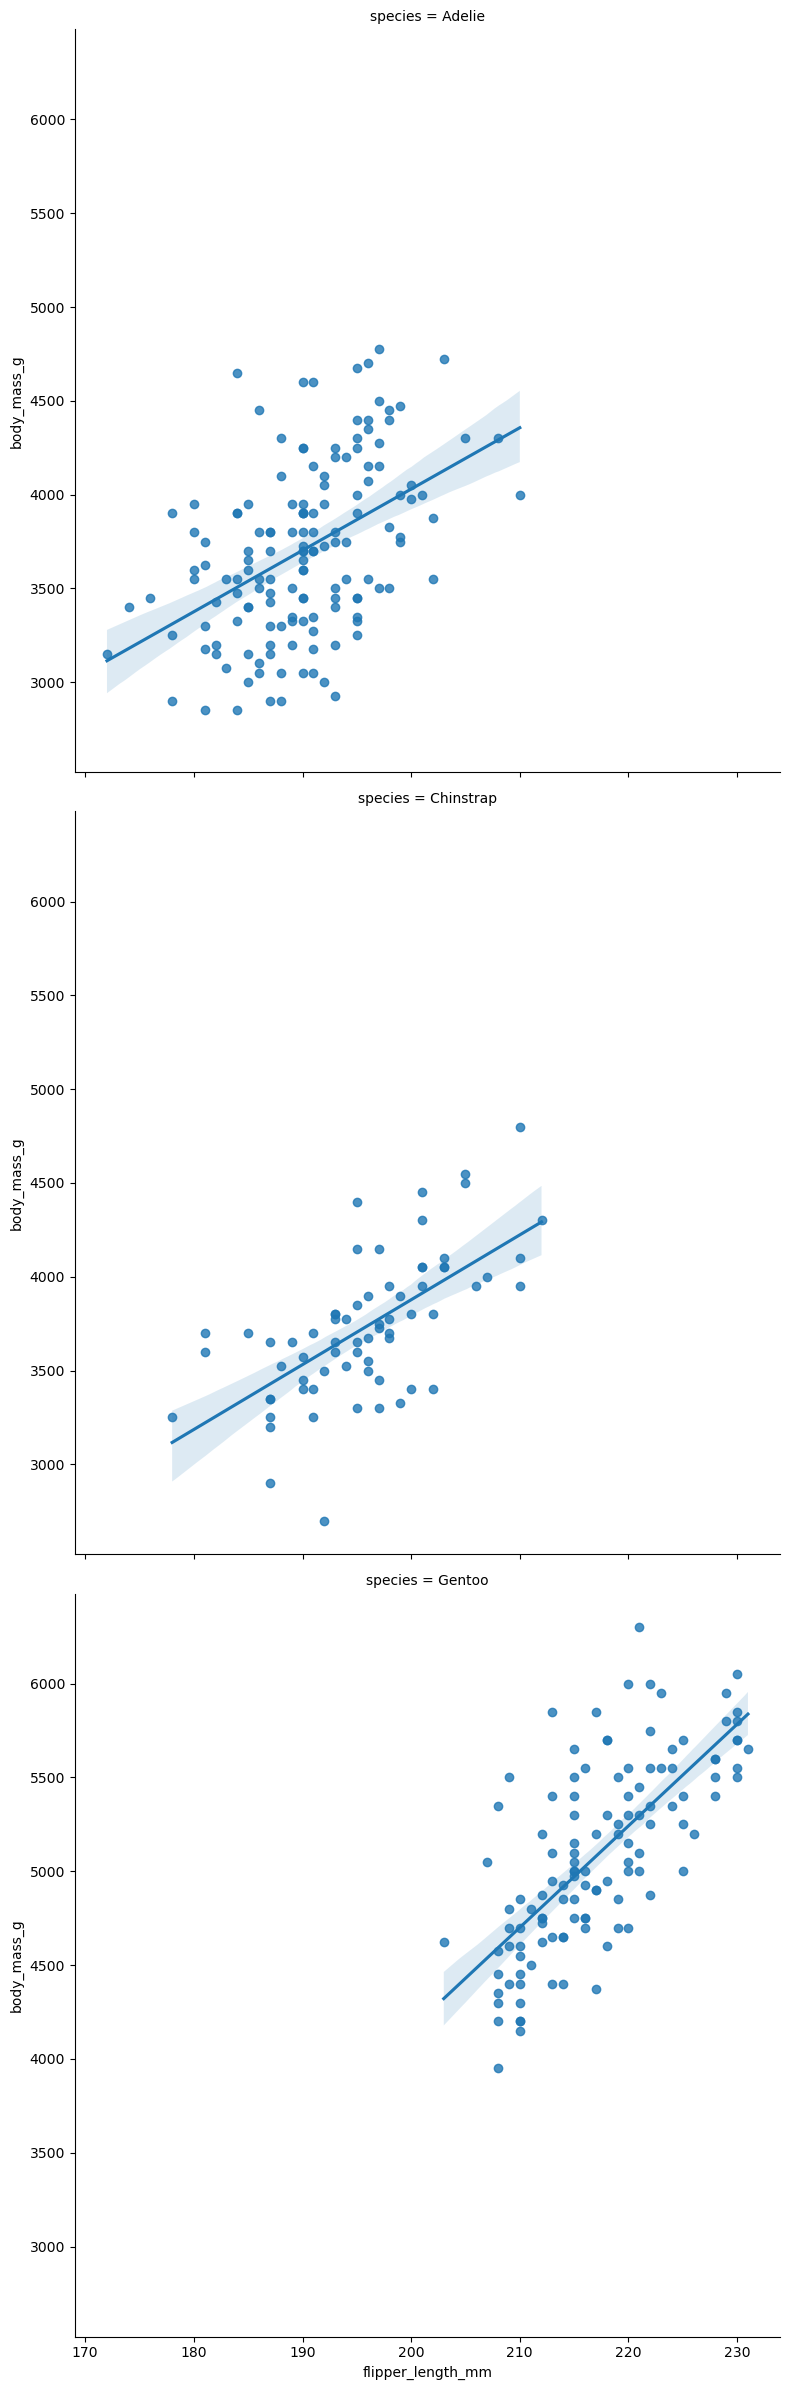

In [22]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=8,
    row='species')

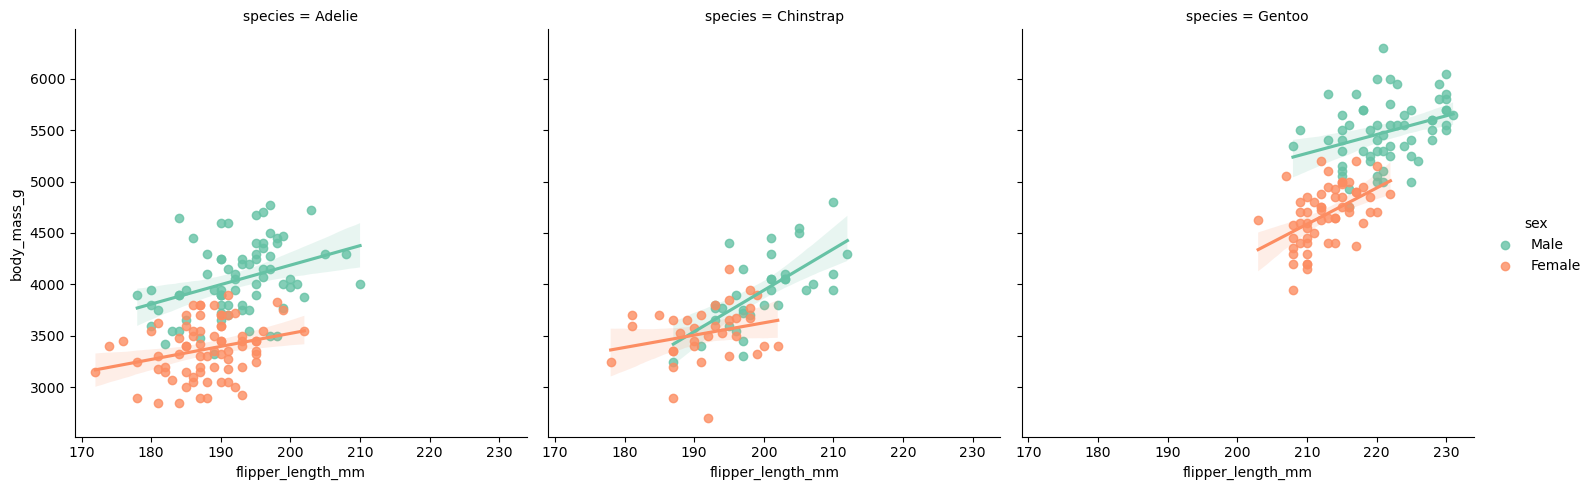

In [23]:
sns.lmplot(
    data=penguins,
    x='flipper_length_mm', 
    y='body_mass_g',
    height=5,
    col='species',
    hue='sex',
    palette='Set2')

## Boxplots

<Axes: xlabel='species', ylabel='body_mass_g'>

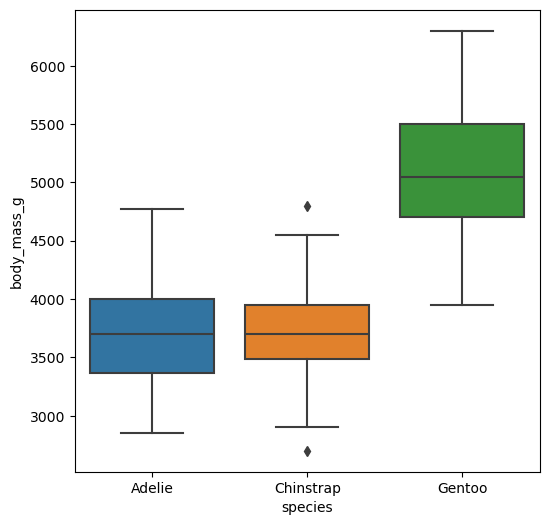

In [24]:
sns.boxplot(
    data=penguins,
    x='species',
    y='body_mass_g')

<Axes: xlabel='body_mass_g', ylabel='species'>

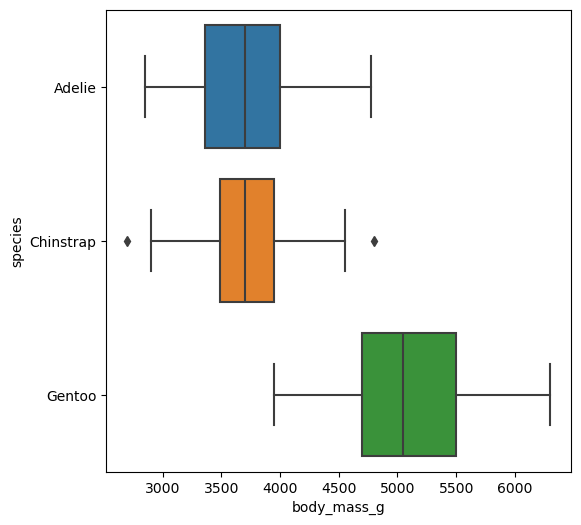

In [25]:
sns.boxplot(
    data=penguins,
    x='body_mass_g',
    y='species',
    )

Text(0, 0.5, 'Body mass (g)')

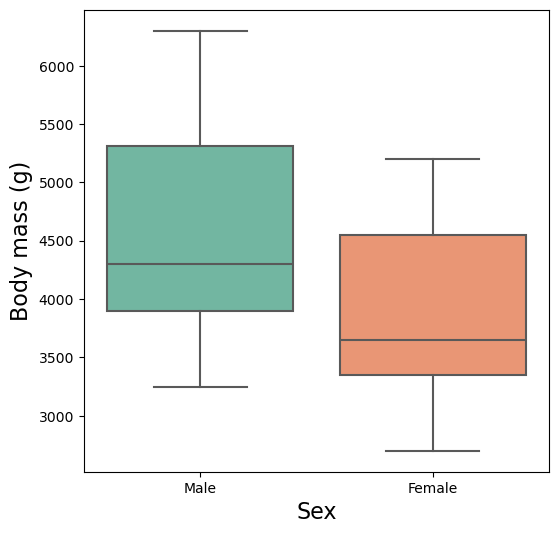

In [26]:
a = sns.boxplot(
    data=penguins,
    x='sex',
    y='body_mass_g',
    palette='Set2')
a.set_xlabel("Sex",fontsize=16)
a.set_ylabel("Body mass (g)",fontsize=16)

Text(0, 0.5, 'Body mass (g)')

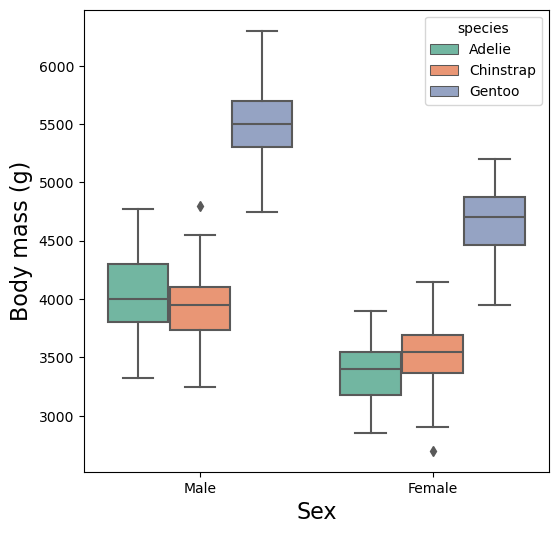

In [27]:
a = sns.boxplot(
    data=penguins,
    x='sex',
    y='body_mass_g',
    hue='species',
    palette='Set2')
a.set_xlabel("Sex",fontsize=16)
a.set_ylabel("Body mass (g)",fontsize=16)

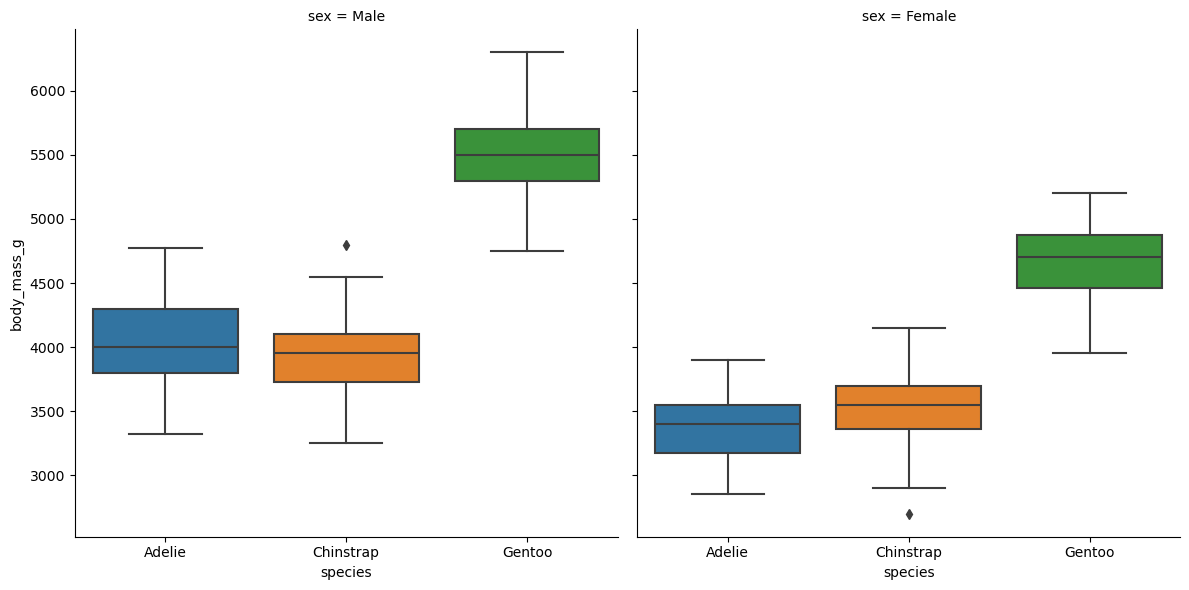

In [28]:
sns.catplot(x='species', y='body_mass_g',
            col='sex', kind='box', height=6,data=penguins)

## Violin plot

<Axes: xlabel='species', ylabel='body_mass_g'>

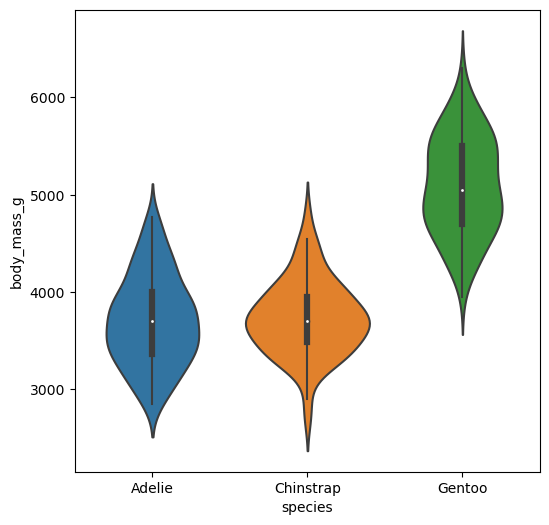

In [29]:
sns.violinplot(
    data=penguins,
    x="species",
    y="body_mass_g")

<Axes: xlabel='body_mass_g', ylabel='species'>

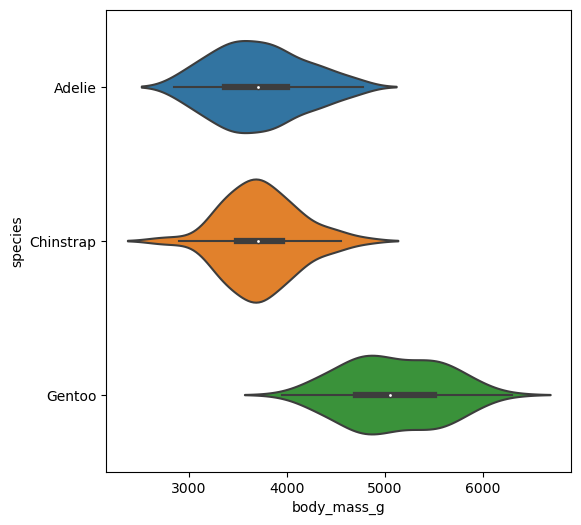

In [30]:
sns.violinplot(
    data=penguins,
    x="body_mass_g",
    y="species")

<Axes: xlabel='body_mass_g', ylabel='species'>

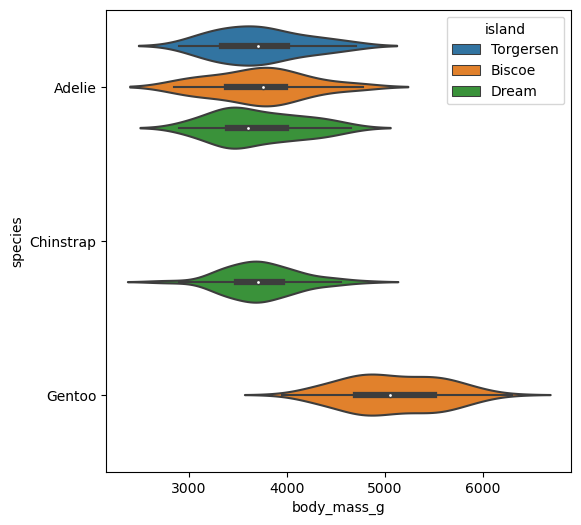

In [31]:
sns.violinplot(
    data=penguins,
    x="body_mass_g",
    y="species",
    hue='island')

<Axes: xlabel='body_mass_g', ylabel='species'>

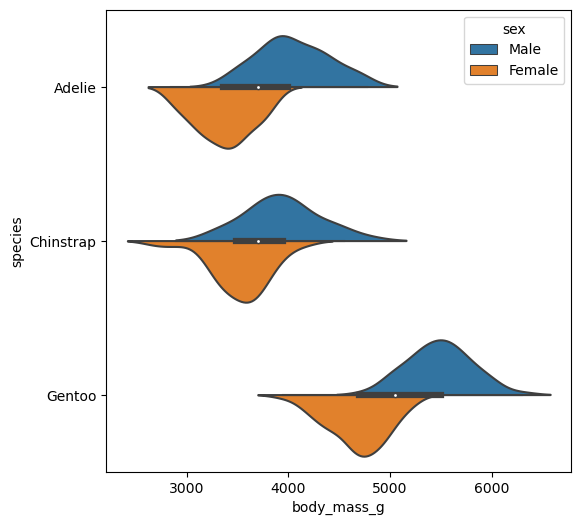

In [32]:
sns.violinplot(
    data=penguins,
    x="body_mass_g",
    y="species",
    hue='sex',
    split=True)

<Axes: xlabel='sex', ylabel='body_mass_g'>

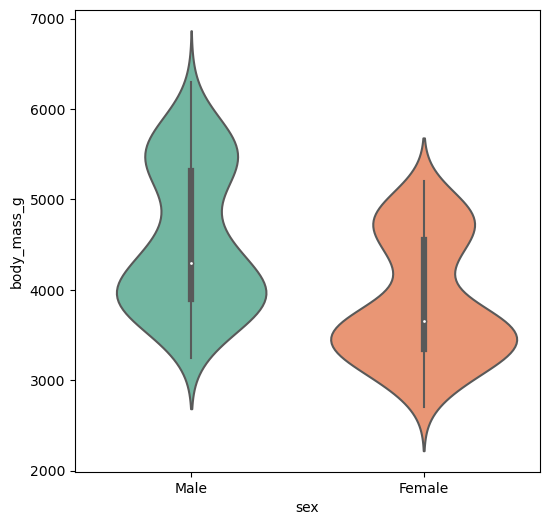

In [33]:
sns.violinplot(
    data=penguins,
    x="sex",
    y="body_mass_g",
    palette="Set2")

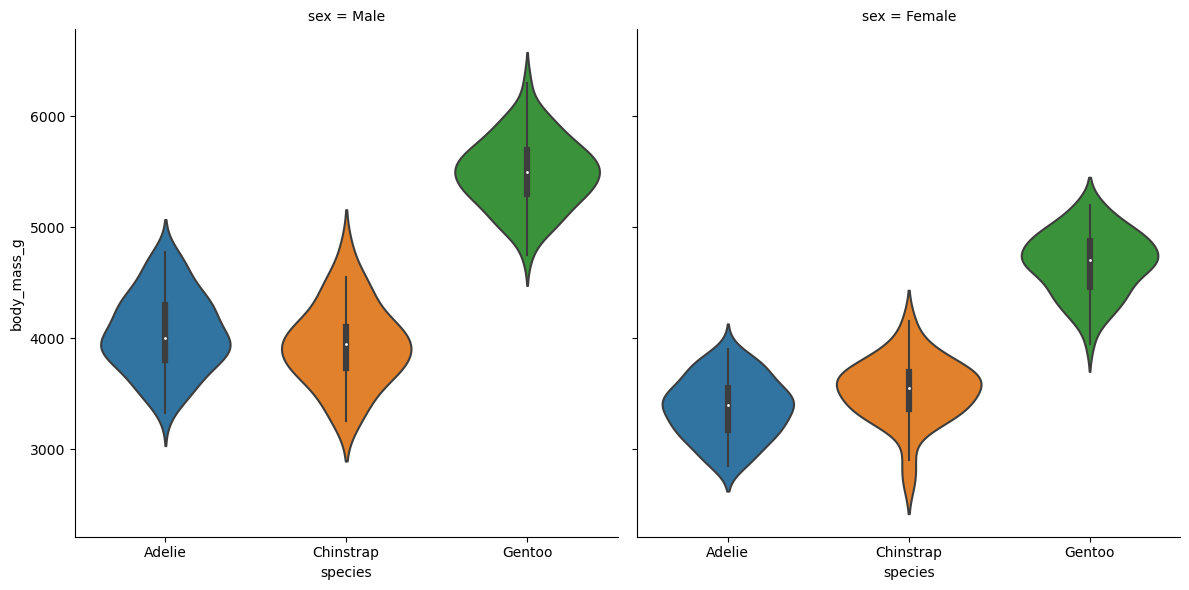

In [34]:
sns.catplot(x='species', y='body_mass_g',
            col='sex', kind='violin', height=6,data=penguins)

## PairGrid

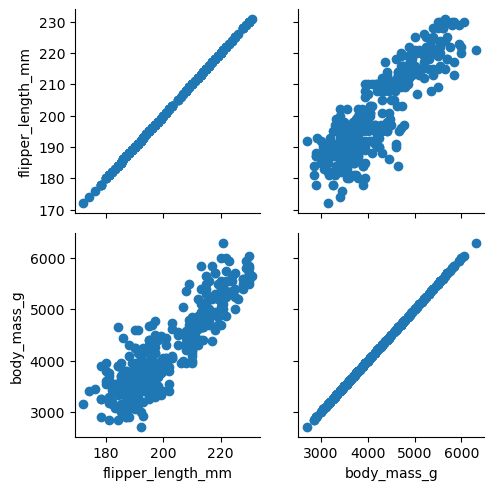

In [35]:
g = sns.PairGrid(penguins, vars=['flipper_length_mm','body_mass_g'])
g.map(plt.scatter)

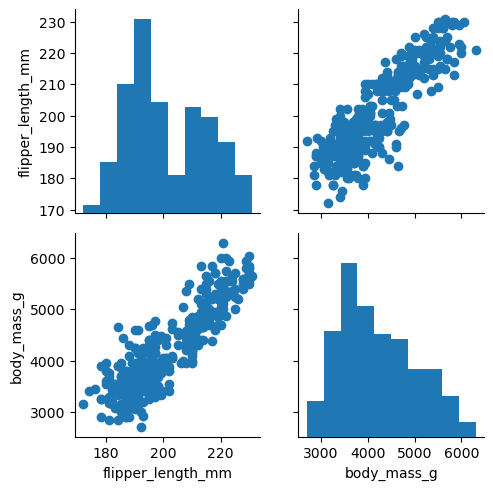

In [36]:
g = sns.PairGrid(penguins, vars=['flipper_length_mm','body_mass_g'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

Below we see an interesting and very convenient function based on PairGrid

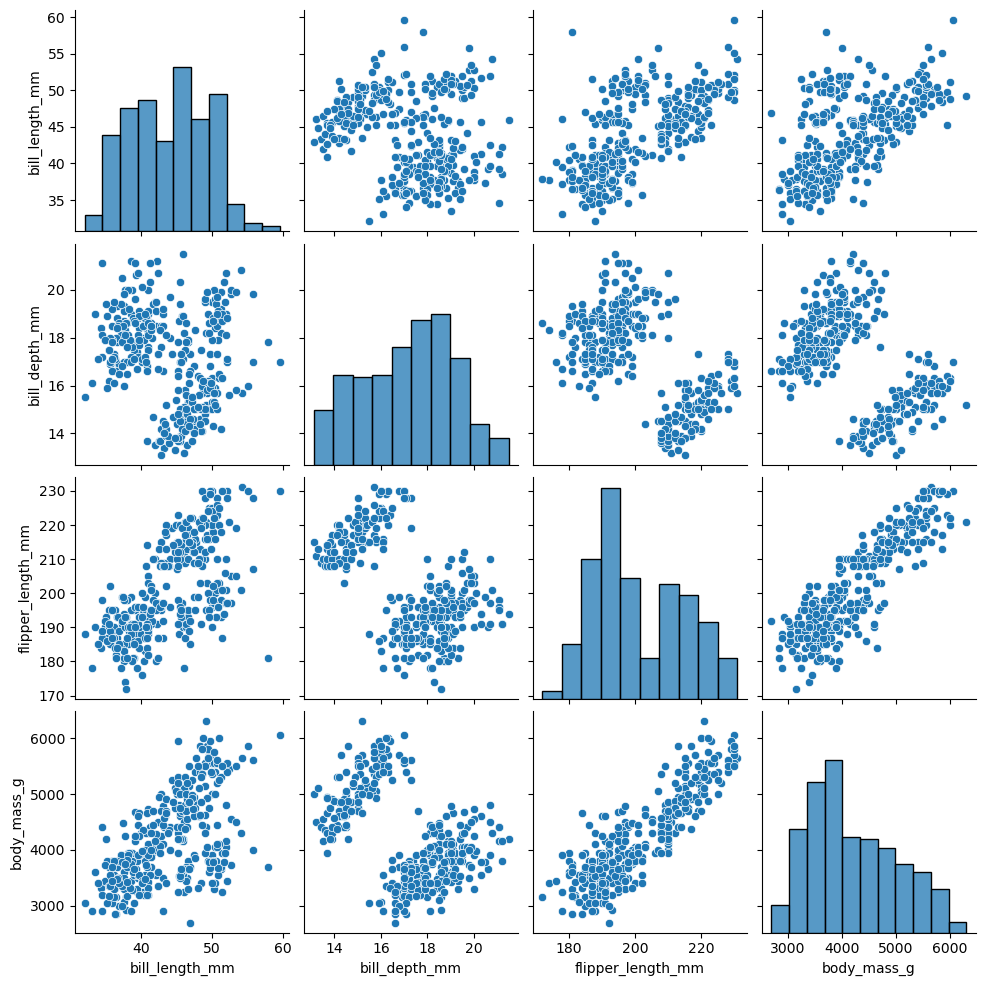

In [37]:
sns.pairplot(penguins)

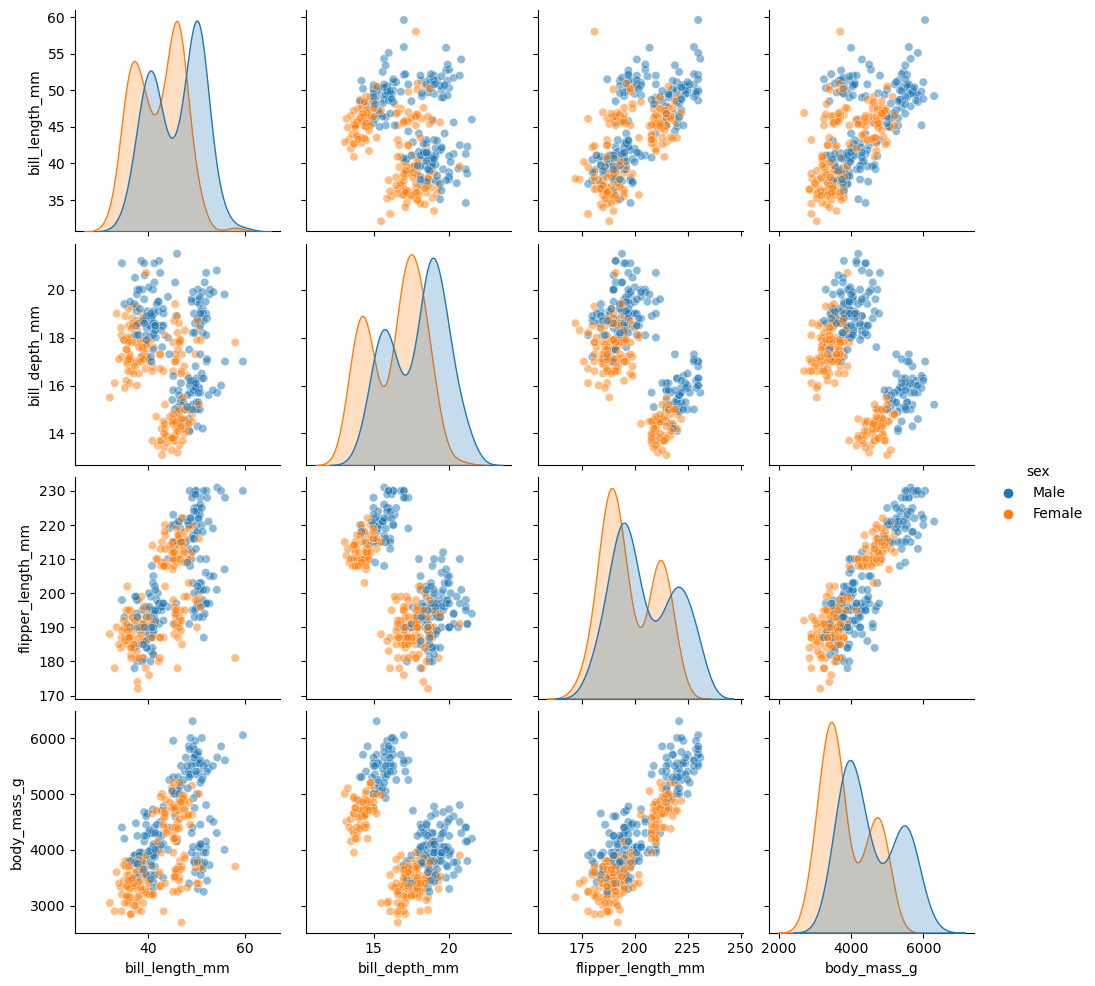

In [38]:
sns.pairplot(penguins, hue='sex', plot_kws={'alpha':0.5})

## Heatmaps

In [39]:
pd.crosstab(penguins['island'],penguins['species'])

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [40]:
pd.crosstab(penguins['sex'],penguins['species'],values=penguins['body_mass_g'],aggfunc='mean')

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,3368.835616,3527.205882,4679.741379
Male,4043.493151,3938.970588,5484.836066


In [41]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

<Axes: xlabel='species', ylabel='sex'>

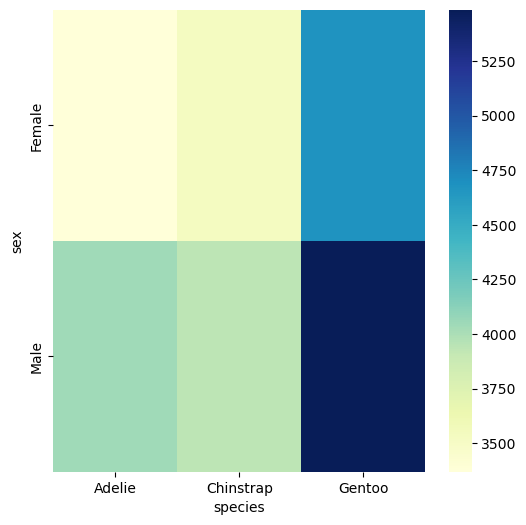

In [42]:
sns.heatmap(pd.crosstab(penguins['sex'],penguins['species'],
                        values=penguins['body_mass_g'],aggfunc='mean'),
           cmap="YlGnBu")

<Axes: xlabel='species', ylabel='sex'>

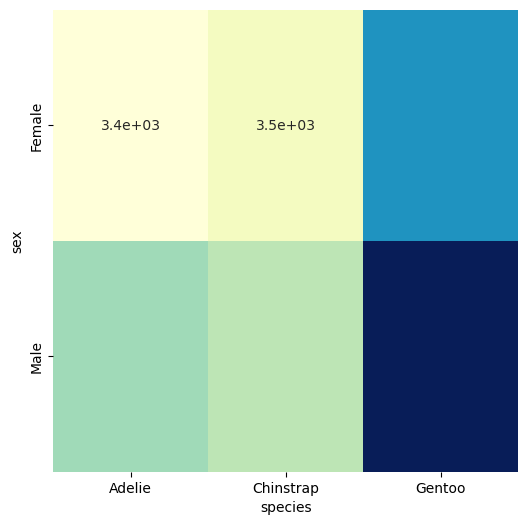

In [43]:
sns.heatmap(pd.crosstab(penguins['sex'],penguins['species'],
                        values=penguins['body_mass_g'],aggfunc='mean'),
           cmap="YlGnBu", annot=True, cbar=False)

In [44]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [45]:
corr_matrix = penguins.loc[:,penguins.dtypes == "float64"].corr()
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

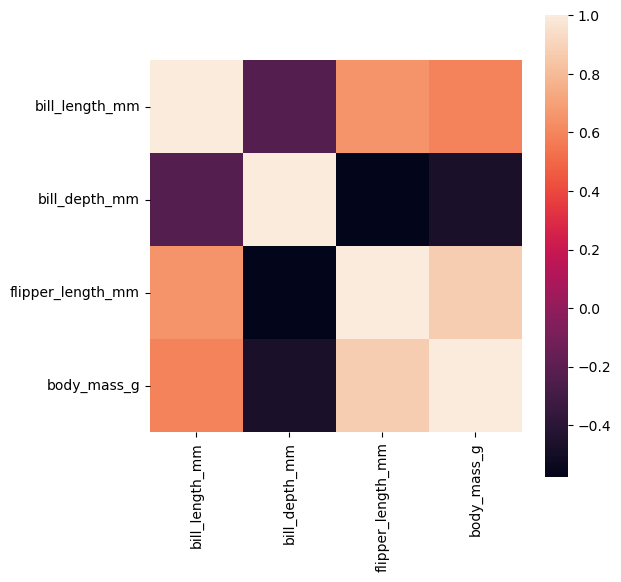

In [46]:
sns.heatmap(corr_matrix,annot=False,square=True)

## Theme options, styles, colors

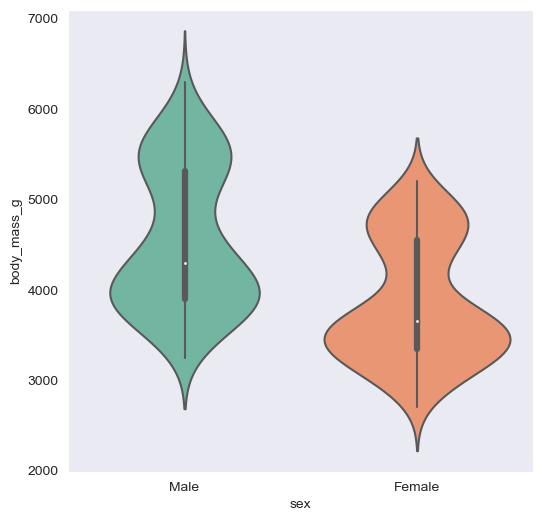

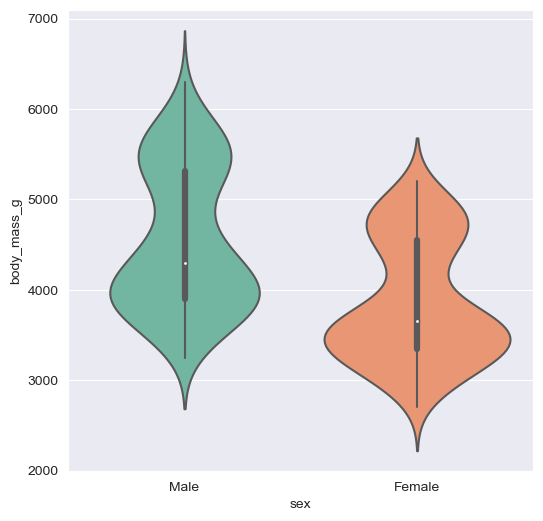

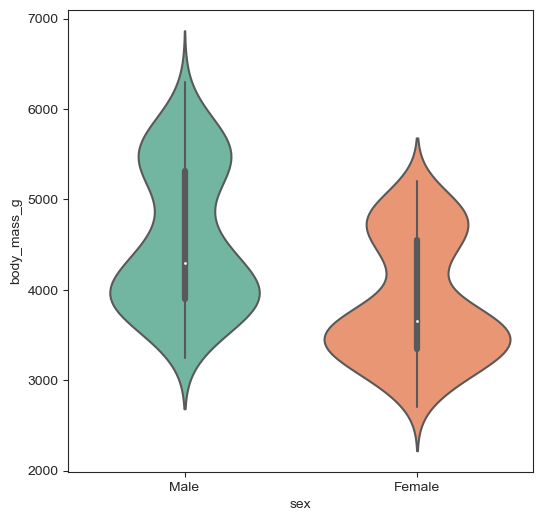

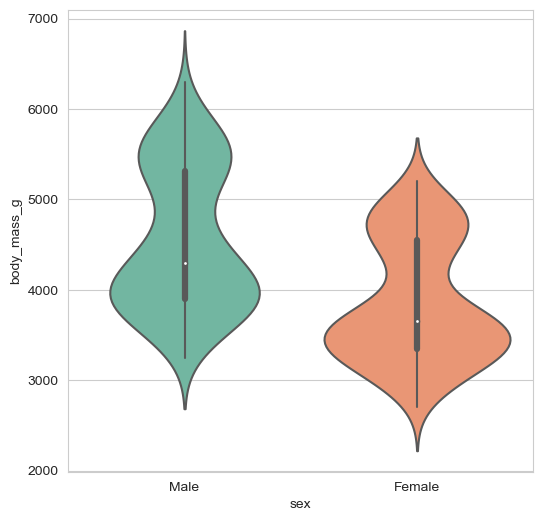

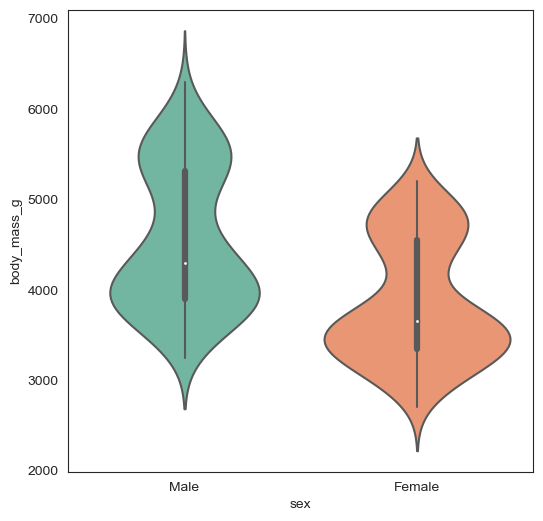

In [47]:
for style in ['dark', 'darkgrid', 'ticks','whitegrid','white']:
    sns.set_style(style)
    sns.violinplot(
    data=penguins,
    x="sex",
    y="body_mass_g",
    palette="Set2")
    plt.show()

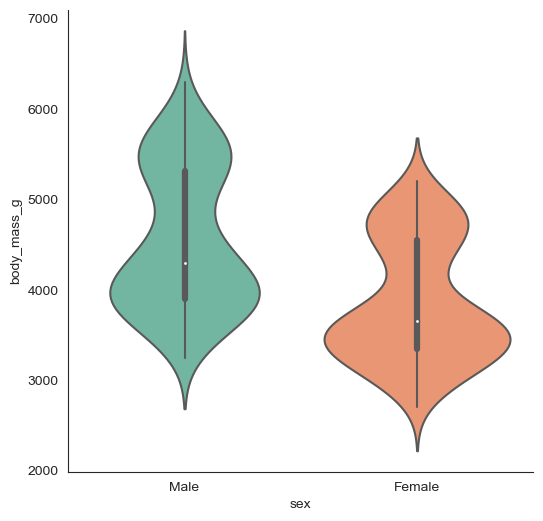

In [48]:
sns.violinplot(
    data=penguins,
    x="sex",
    y="body_mass_g",
    palette="Set2")
sns.despine()

In [49]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

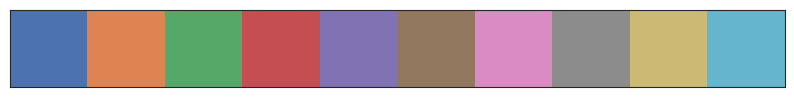

In [50]:
sns.set_palette('deep')
sns.palplot(sns.color_palette())

We can set up a paletter with sequential colors

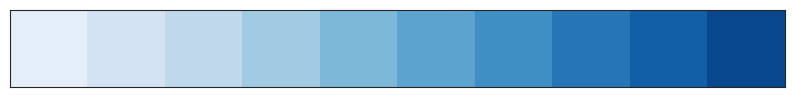

In [51]:
sns.palplot(sns.color_palette('Blues',10))

Another interesting options is to use divergent colors. Useful when we are interested in low and high values

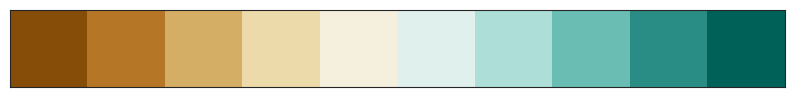

In [52]:
sns.palplot(sns.color_palette('BrBG',10))

## Exercises

### Exercise 1

We will work with the `titanic` dataset. The dataset is available through the seaborn package. You will have to run the following: `titanic = sns.load_dataset('titanic')`.

* Create a scatter plot that has a regression line of the `age` column on the `fare` one. Make an accompany plot of the residuals.
* Same plot as above but this time including separate regression lines for males and females. Try to change the colour palette using one of your choice.
* Create separate scatter plots for each class that include a regression line of the `age` column on the `fare`.
* Create a boxplot that shows the number the age range from each class.
* Same as above but including the sex information as well on the same plot. Try to create separate plots based on sex.
* Create a horizontal violinplot depicting the fare payed for each class. Include the survival status on the same plot.
* As above but create separate violin plots based on sex.

### Exercise 2 

We will work with the `tilapia_pheno.txt` file.

* Create a pair plot for all the growth related columns (Weight, Length and AGR). 
* Same plot but using different colours for the two locations. Change the transparence of the points to 0.5.
* Calculate Pearson correlations amongst all the growth related columns (Weight, Length and AGR). Create a heatmap. Annotate the heatmap with the correlation values. Adjust the orientation of the y labels to facilitate the reader.

### Exercise 3

We will work with the `auc_scores.txt` file. The file contains scores for different models.

* Create a violin plot depicting the auc score of each model.
* Same as above but this time on a horizontal violin plot depict separate auc scores for skewed and not skewed cases of each model. Add a legend. 